# Exercise Thirteen: Interface

This week, you'll be revisiting a database (such as our example, gathered from Tweepy) and exploring methods for visualizing the data to others. Your exercise should:

- Import or collect your data as appropriate, using OS or an API
- Make and structure your data in a Pandas dataframe
- Use NLTK to tokenize the data, and chart a word cloud
- Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API
- Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed

Consider exploring other visualization types in the Bokeh API documentation, and play with the color options and scale of your visualization.



Import of TAGS scrapped data on Spider-Man related hashtag No Way Home.  #NoWayHome was a top 10 trender on the morning of 11/16/2021.

In [3]:
import pandas as pd

df_tweets = pd.read_csv("nowayhome.csv")


In [4]:
print(df_tweets.dtypes)

id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates              float64
user_lang                    float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
user_location                 object
status_url                    object
entities_str                  object
dtype: object


In [5]:
df_tweets['text'] = df_tweets['text'].astype(str) # This converted the text column to a string so I could properly run the Cleaned Tweets cell below.

In [6]:
print(df_tweets.dtypes)

id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates              float64
user_lang                    float64
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
user_location                 object
status_url                    object
entities_str                  object
dtype: object


Make and structure #NoWayHome data in a Pandas dataframe

In [7]:
df_tweets.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1.460627e+18,Isaa_Silvaa_002,RT @CamiliV72679845: Todo dia tenho pesadelos ...,Tue Nov 16 15:14:39 +0000 2021,16/11/2021 15:14:39,NaN,NaN,NaN,NaN,1.357343e+18,NaN,"<a href=""http://twitter.com/download/android"" ...",http://pbs.twimg.com/profile_images/1432291119...,20.0,69.0,"Minas Gerais, Brasil",http://twitter.com/Isaa_Silvaa_002/statuses/14...,"{""hashtags"":[{""text"":""NoWayHome"",""indices"":[68..."
1,1.460627e+18,lez_lepiej,Chyba wiem kto stoi za przeciekami i tym całym...,Tue Nov 16 15:14:38 +0000 2021,16/11/2021 15:14:38,NaN,NaN,NaN,NaN,1.298886e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1446088656...,369.0,116.0,NaN,http://twitter.com/lez_lepiej/statuses/1460627...,"{""hashtags"":[{""text"":""NoWayHome"",""indices"":[57..."
2,1.460627e+18,thejere07,RT @juandavidrrz: yo con la esperanza de ver a...,Tue Nov 16 15:14:35 +0000 2021,16/11/2021 15:14:35,NaN,NaN,NaN,NaN,1.194261e+08,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8979544770...,154.0,121.0,NaN,http://twitter.com/thejere07/statuses/14606273...,"{""hashtags"":[{""text"":""Spiderman"",""indices"":[11..."
3,1.460627e+18,KlNG_Rayquan,RT @spidershollnd: I deserve a date from Tobey...,Tue Nov 16 15:14:35 +0000 2021,16/11/2021 15:14:35,NaN,NaN,NaN,NaN,7.596342e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1412648229...,769.0,893.0,"Charlotte, NC",http://twitter.com/KlNG_Rayquan/statuses/14606...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
4,1.460627e+18,Alexand12477863,RT @LynksMultiverse: His return was foretold 👀...,Tue Nov 16 15:14:35 +0000 2021,16/11/2021 15:14:35,NaN,NaN,NaN,NaN,8.515083e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1455442092...,248.0,1288.0,NaN,http://twitter.com/Alexand12477863/statuses/14...,"{""hashtags"":[{""text"":""mcu"",""indices"":[48,52]},..."


In [8]:
import re
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#']
combined_re = re.compile( '|'.join( re_list) )
regex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)

Use NLTK to tokenize the data, and chart a word cloud.

In [9]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [10]:
cleaned_tweets = []
for i in range(0,len(df_tweets['text'])):
    # After getting this error, I tried replacing Tweet with nowayhome, tweet, and empty brackets.  All produced the same type of error.
    cleaned_tweets.append(cleaning_tweets((df_tweets.text[i])))
print(cleaned_tweets[0:50])

['todo dia tenho pesadelos com tom holland nowayhome', 'chyba wiem kto stoi przeciekami tym całym cyrkiem nowayhome', 'con esperanza ver andrew garfield tobey maguire tom holland spiderman way home spiderman spidermannowayhome spidermannowayhometrailer nowayhome', 'deserve date from tobey maguire andrew garfield and tom holland like this spiderman way home spidermannowayhome nowayhome', 'his return was foretold mcu nowayhome daredevil', 'nowayhome its tuesday bitches', 'hoy día gala spiderman nowayhome spidermannowayhome', 'pst cannot wait for the spiderman trailer you think they show toby and andrew nowayhome', 'vibes are tremendous today spiderman nowayhome', 'hoje tem trailer nowayhome jogo seleção paz', 'omfg imagine this really happens the trailer spiderman nowayhome', 'hoy hoy spiderman spiderverseconfirmado spidermannowayhometrailer nowayhome', 'spider man leaks all the way home nowayhome', 'tom reaching grab zendaya arm just sent they cute nowayhome', 'hoy 9pm stream jugando sp

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["spiderman","spider-man","NoWayHome", "Spider", "Man", "spidermannowayhometrailer", "spidermannowayhome"])

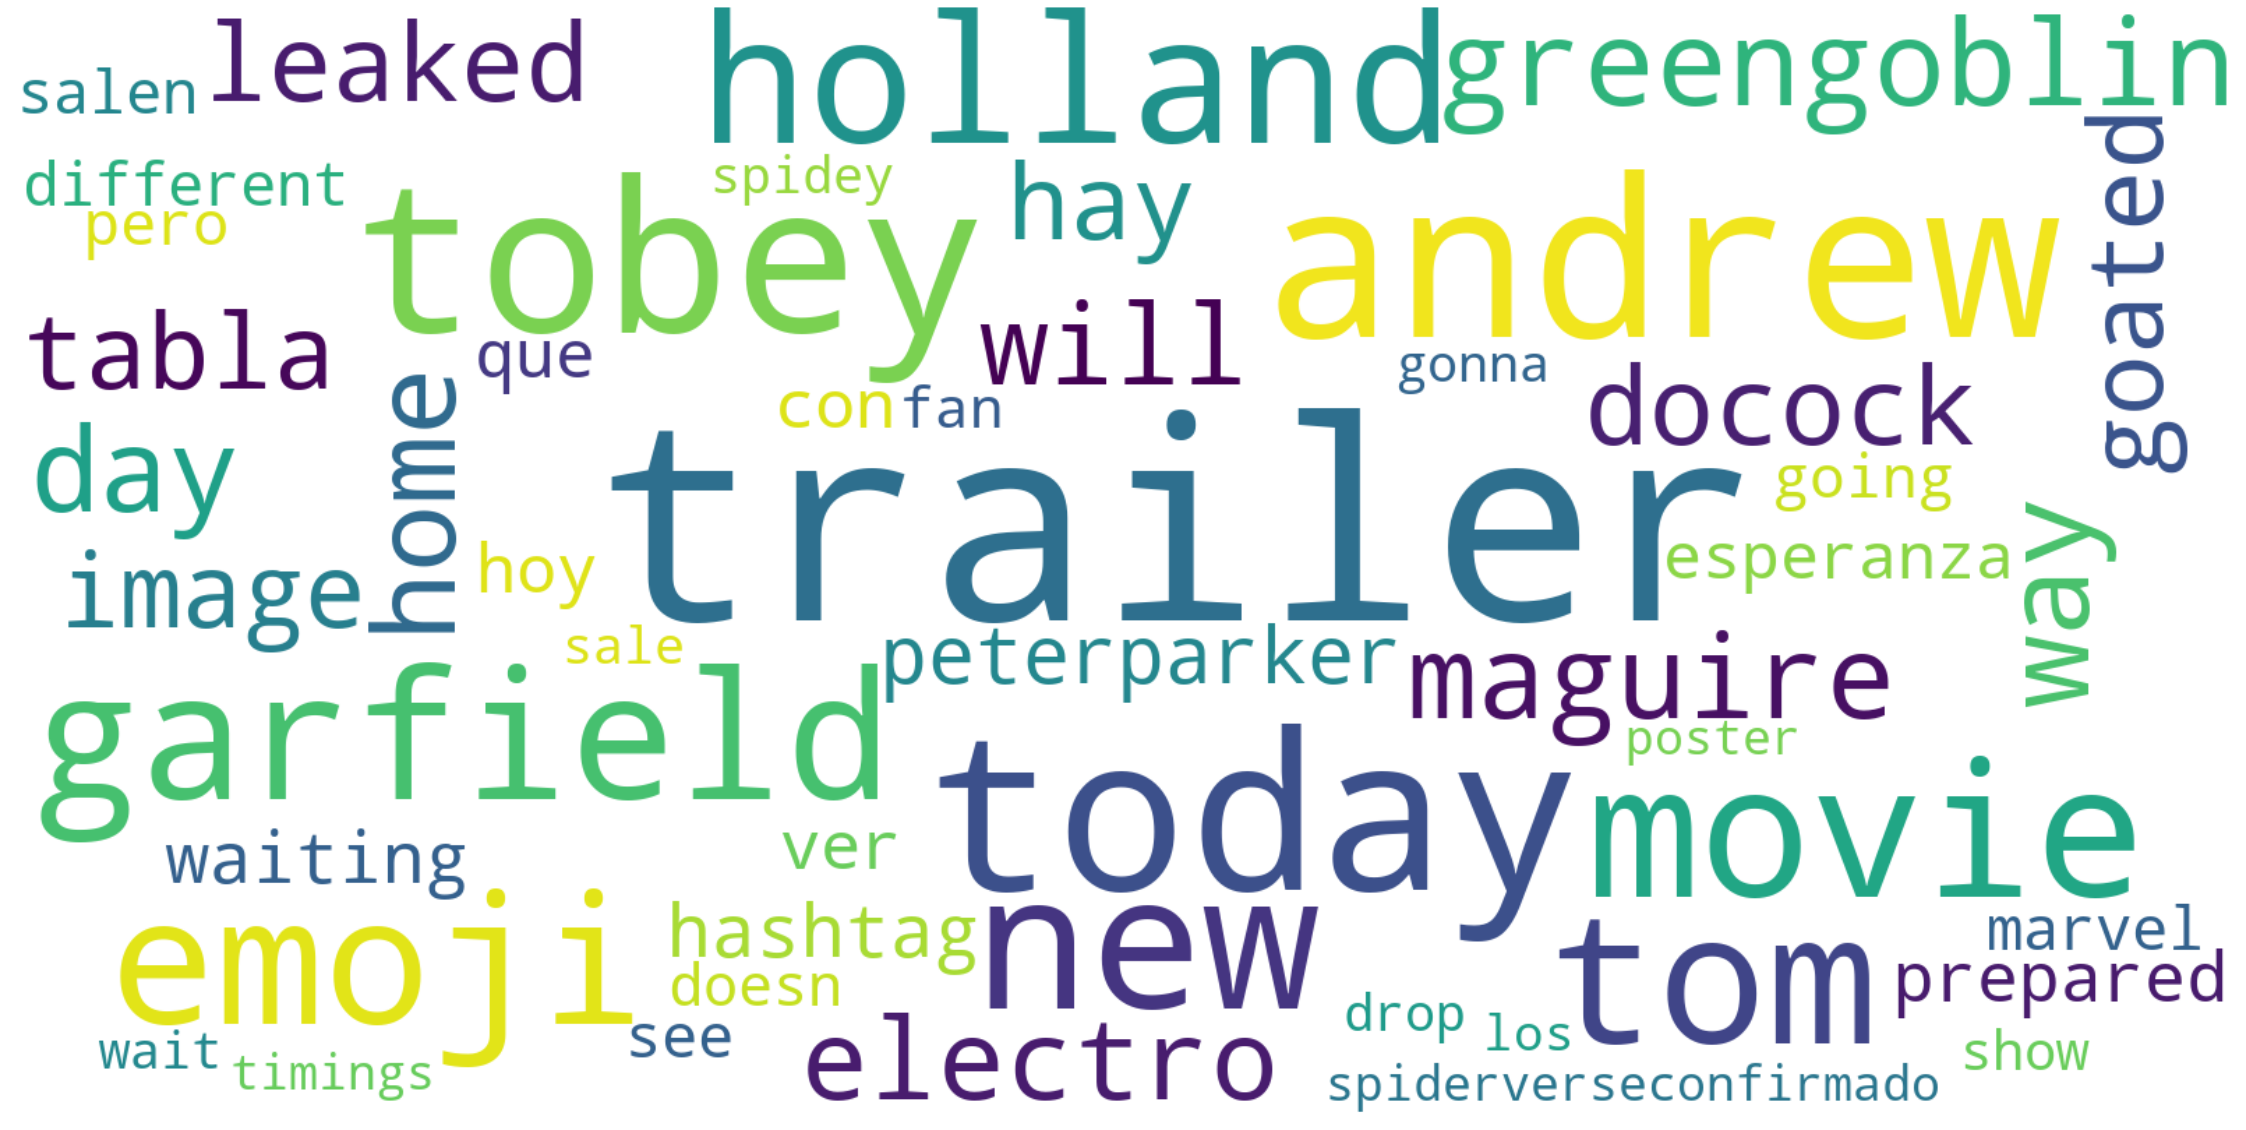

In [14]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, background_color='white').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Create a "wordcloud of interest" by playing with the visualization methods from the class demo, or others documented in the API

In [15]:
import numpy as np
# Python Imaging Library
from PIL import Image
import random

In [36]:
mask = np.array(Image.open('./spidey_head.jpg'))

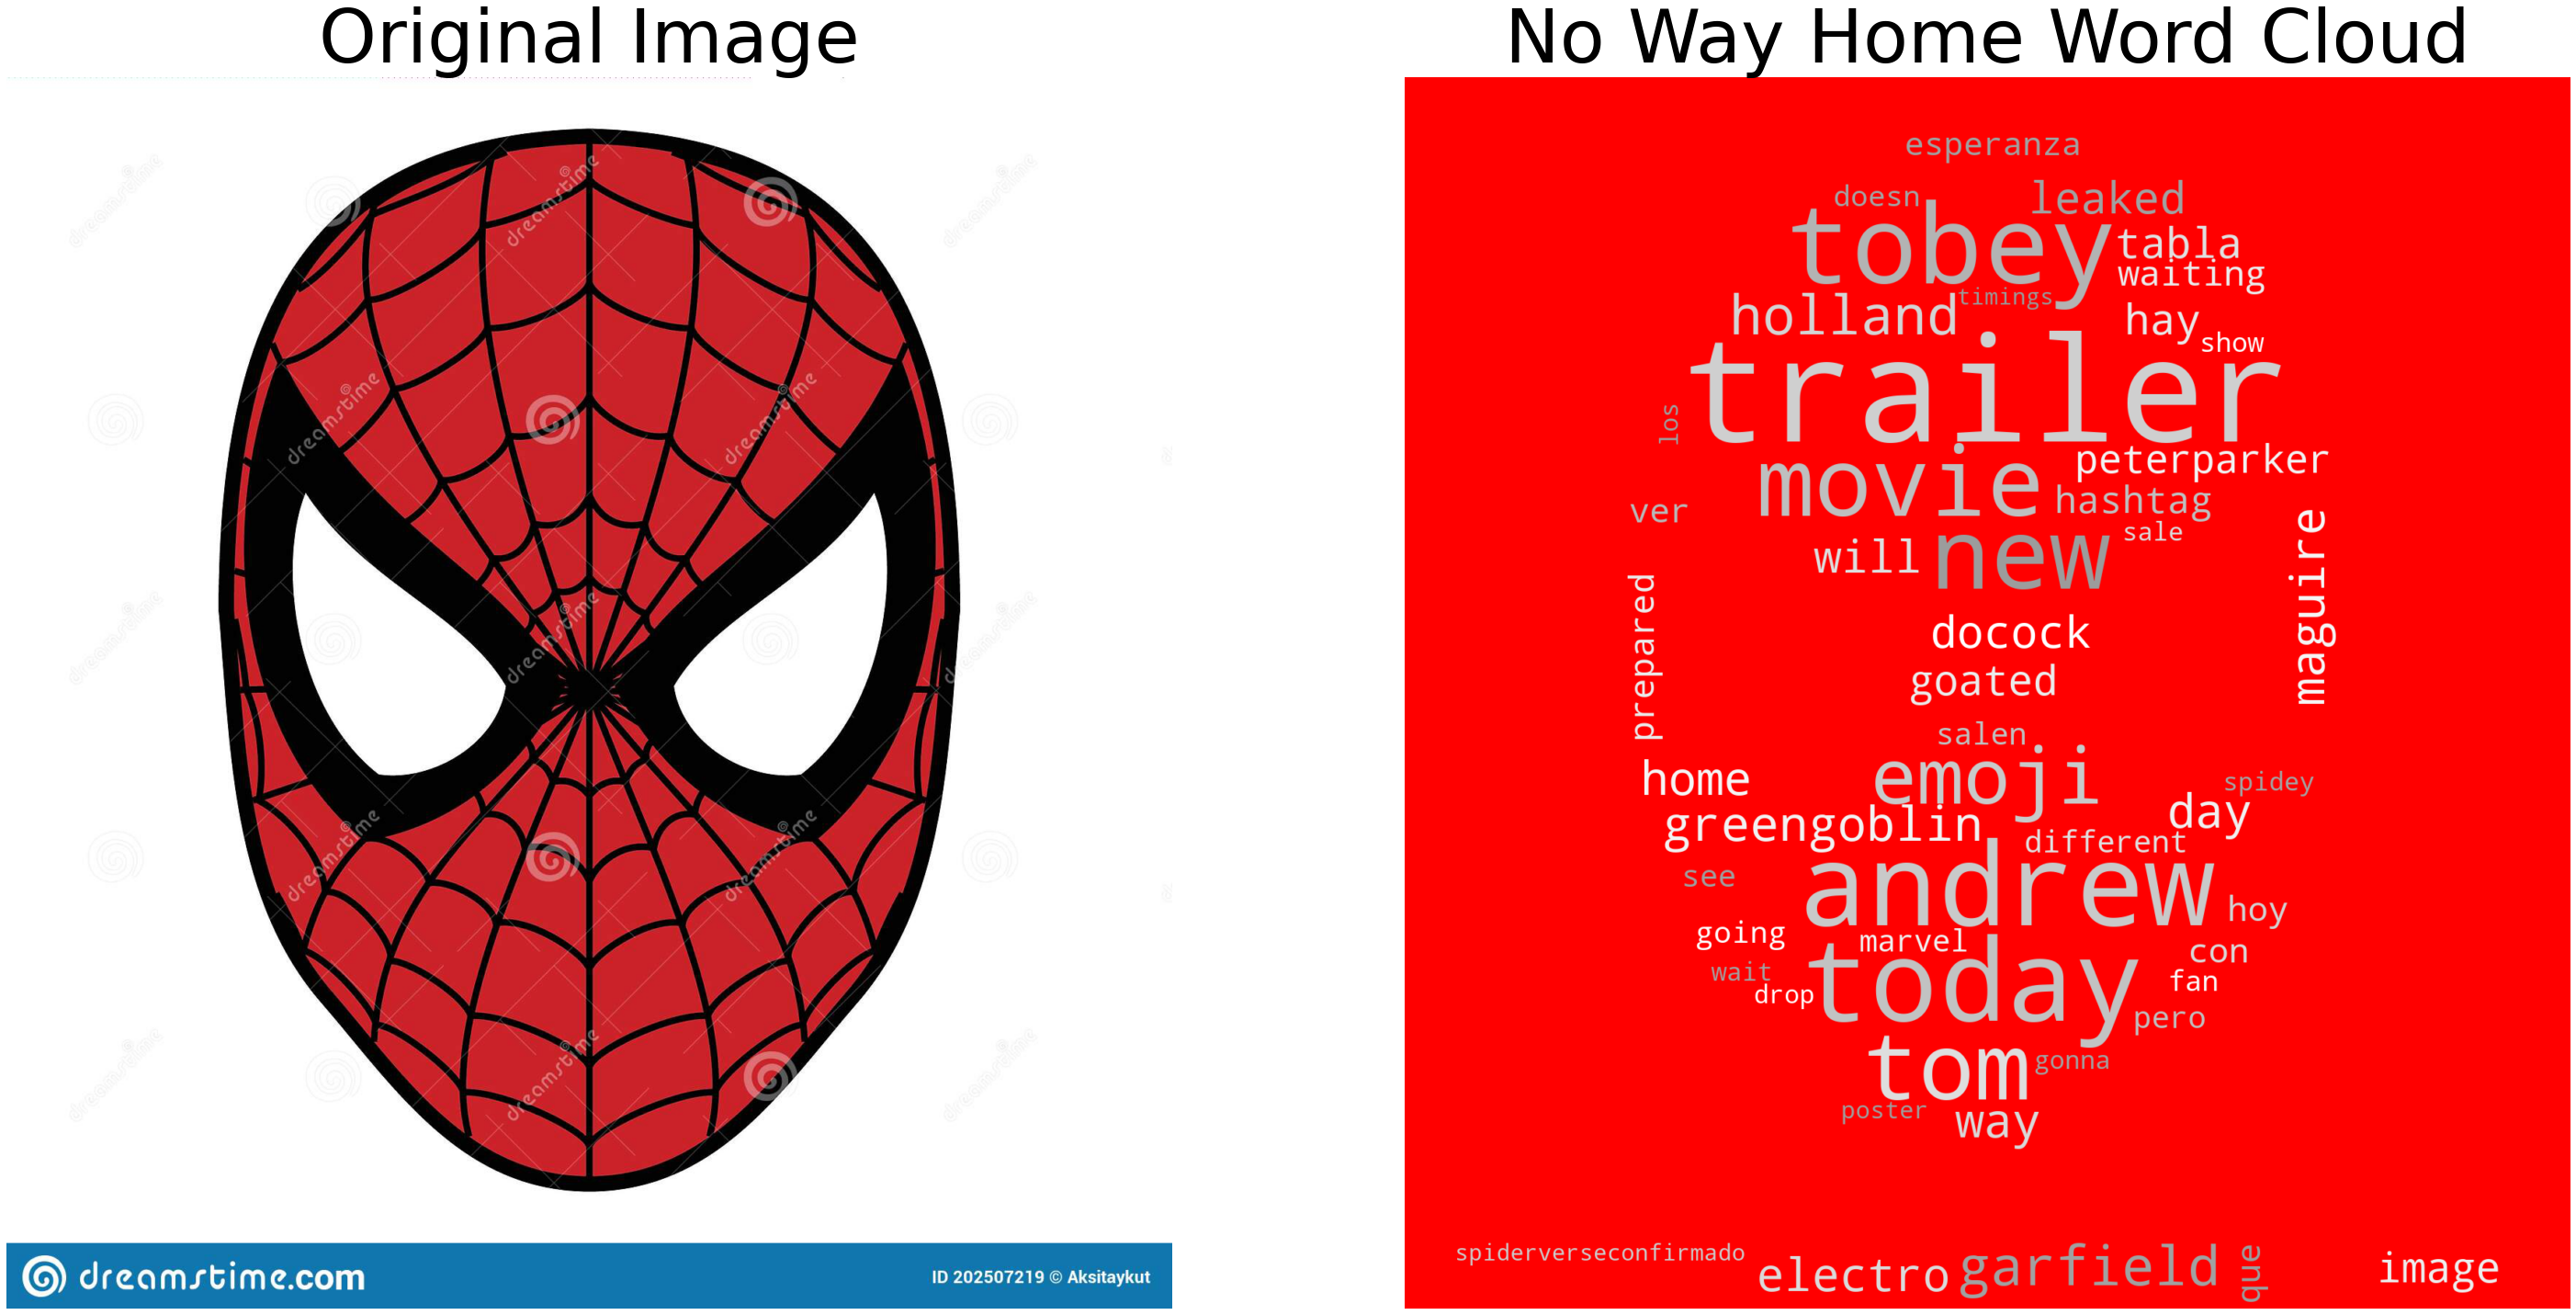

In [37]:
# Making the wordcloud
wordcloud = WordCloud(width=1600, mask = mask,stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False,background_color='red').generate(string)
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
# Colors of the words in the cloud
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
plt.title('Original Image', size=80)

plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.title('No Way Home Word Cloud', size=80)
plt.axis("off")
plt.show()

Import Bokeh and chart some aspect of the text: this could be the wordcount, topics, or sentiment analysis as demoed

Consider exploring other visualization types in the Bokeh API documentation, and play with the color options and scale of your visualization.